<a href="https://colab.research.google.com/github/matiascabrejos/IA-Humai/blob/main/exercise_class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
ESTIMACIONES_URL = "http://datos.agroindustria.gob.ar/dataset/9e1e77ba-267e-4eaa-a59f-3296e86b5f36/resource/95d066e6-8a0f-4a80-b59d-6f28f88eacd5/download/estimaciones-agricolas-al-30-09-2019.csv"
ESTIMACIONES_URL_S3 = "https://datasets-humai.s3.amazonaws.com/datasets/estimaciones_agricolas.zip"
ESTIMACIONES_PATH = "data/estimaciones-agricolas.csv"

In [ ]:
converters = {
    "id_provincia": lambda x: str(x).zfill(2),
    "id_departamento": lambda x: str(x).zfill(3),
}

#estimaciones = pd.read_csv(ESTIMACIONES_URL, encoding="latin1", converters=converters)estimaciones = pd.read_csv(ESTIMACIONES_URL, encoding="latin1", converters=converters)
estimaciones = pd.read_csv(ESTIMACIONES_URL_S3, encoding="utf8", converters=converters)
#estimaciones.to_csv(ESTIMACIONES_PATH, encoding="utf8", index=False)
#estimaciones = pd.read_csv(ESTIMACIONES_PATH, converters=converters)

In [ ]:
estimaciones.columns

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada',
       'sup_cosechada', 'produccion', 'rendimiento'],
      dtype='object')

In [ ]:
estimaciones.columns = [col.strip() for col in estimaciones.columns]

In [ ]:
estimaciones['campaña']

0         1969/1970
1         1970/1971
2         1969/1970
3         1970/1971
4         1971/1972
            ...    
136046    1993/1994
136047    1994/1995
136048    1995/1996
136049    1996/1997
136050    1997/1998
Name: campaña, Length: 136051, dtype: object

In [ ]:
estimaciones["produccion"] = estimaciones.produccion.astype(float) / 1000000

In [ ]:
estimaciones["campaña"] = estimaciones.campaña.str.replace("2010/2017", "2010/2011")

In [ ]:
produccion_anual = estimaciones.pivot_table(
    index=["campaña"],
    values=["produccion"],
    aggfunc="sum"
)

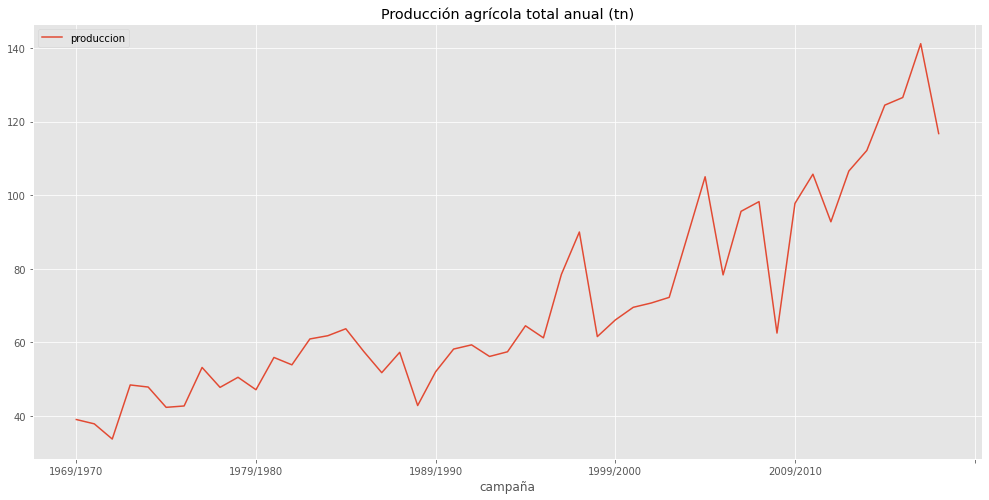

In [ ]:
produccion_anual.plot(
    figsize=(17, 8),
    title="Producción agrícola total anual (tn)"
)

In [ ]:
produccion_anual.tail()

,produccion
campaña,
2014/2015,124.498769
2015/2016,126.571125
2016/2017,141.203713
2017/2018,116.768681
2018/2019,30.468652


In [ ]:
estimaciones = estimaciones[estimaciones.campaña != "2018/2019"]